In [1]:
import pandas as pd
import numpy as np
import statsmodels as sms
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sb
import sys
#sys.path.insert(1, 'ipyleaflet/ipyleaflet')
from ipyleaflet import *
#from ipyleaflet.leaflet import *
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import math
n1 = 1000
n2 = 1000
p1 = .500
p2 = .550
x1 = n1*p1
x2 = n2*p2
p = (x1+x2)/(n1+n2)
n = (p1-p2)
a = p*(1-p)             
b = (1/n1) + (1/n2)
c = a * b
d = math.sqrt(c)
z = n/d
print('z = ',z)

z =  -2.238868314198227


In [3]:
import scipy.stats as st
st.norm.cdf(z)*2

0.025164485700318397

In [4]:
#Hypothesis is that there is no difference in ad clicks between A and B

ad_clicks = np.array([500,550])
total_views = np.array([1000,1000])

stat, pval = proportions_ztest(ad_clicks, total_views)
print('{0:0.3f}'.format(pval))
print(stat)

#We can reject the null hypothesis

0.025
-2.238868314198227


In [5]:
p1 = "/Users/derekolson/DerekOlson/CS6017/homework2/realEstate1.csv"
p2 = "/Users/derekolson/DerekOlson/CS6017/homework2/realEstate2.csv"
csv1 = pd.read_csv(p1)
csv2 = pd.read_csv(p2)
frames = [csv1, csv2]
data = pd.concat(frames)

In [6]:
df = data[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
df['TotSqf'] = df['TotSqf'].str.replace(',', '').astype(float)

In [7]:
series = df['PropType']
df['prop_type'] = series.map({'Condo':0, 'Townhouse':0, 'Single Family':1})

In [8]:
df = df[df.Longitude != 0]
df = df[df.Taxes < 99242]
df = df[df.LstPrice > 200000]
df = df[df.LstPrice < 1000000]

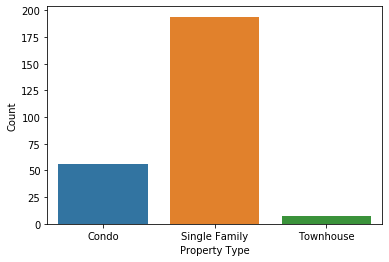

In [9]:
# my dataframe has 257 items and 16 variables.
prop_type_agg = df.groupby(df.PropType).count()
prop_type_agg['Property Type'] = prop_type_agg.index
prop_type_agg['Count'] = prop_type_agg['prop_type']
sb.barplot(x='Property Type', y='Count', data = prop_type_agg)

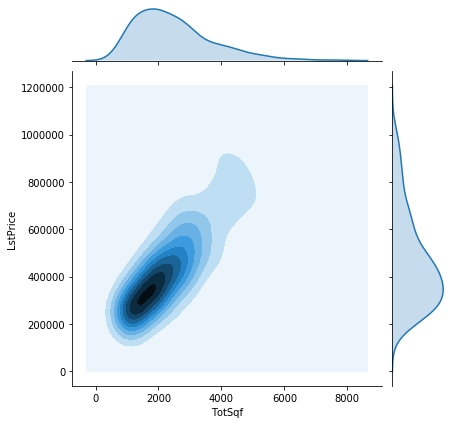

In [10]:
sb.jointplot('TotSqf', 'LstPrice', data=df, kind="kde")

,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,prop_type
Acres,1.000000,0.165732,0.447886,0.568249,0.235933,0.716560,0.005157,0.178064,0.709380,0.678446,0.588819,0.504789,0.738043,0.110440,0.550447
Deck,0.165732,1.000000,0.079294,0.184221,0.019710,0.165510,0.753466,0.027597,0.161274,0.119304,0.117856,0.107399,0.173308,0.130219,0.067675
GaragCap,0.447886,0.079294,1.000000,0.323426,0.079707,0.636116,-0.048481,-0.026026,0.626073,0.629634,0.352746,0.597674,0.570661,0.470059,0.013056
Latitude,0.568249,0.184221,0.323426,1.000000,-0.252985,0.371438,-0.026625,0.169701,0.374229,0.344140,0.292322,0.299270,0.415019,0.333459,0.293326
Longitude,0.235933,0.019710,0.079707,-0.252985,1.000000,0.375739,0.047546,0.044034,0.378518,0.345215,0.315474,0.141285,0.275745,-0.231580,0.332640
LstPrice,0.716560,0.165510,0.636116,0.371438,0.375739,1.000000,-0.017352,0.164530,0.994978,0.878184,0.649052,0.738358,0.866691,0.207930,0.375962
Patio,0.005157,0.753466,-0.048481,-0.026625,0.047546,-0.017352,1.000000,-0.033298,-0.013058,-0.038108,0.012585,-0.057990,-0.017008,-0.026131,0.078574
PkgSpacs,0.178064,0.027597,-0.026026,0.169701,0.044034,0.164530,-0.033298,1.000000,0.149729,0.094513,0.204235,0.138750,0.188713,-0.170480,0.245102
SoldPrice,0.709380,0.161274,0.626073,0.374229,0.378518,0.994978,-0.013058,0.149729,1.000000,0.873635,0.644520,0.725855,0.856134,0.202465,0.383369
Taxes,0.678446,0.119304,0.629634,0.344140,0.345215,0.878184,-0.038108,0.094513,0.873635,1.000000,0.547986,0.726250,0.814223,0.307737,0.240413


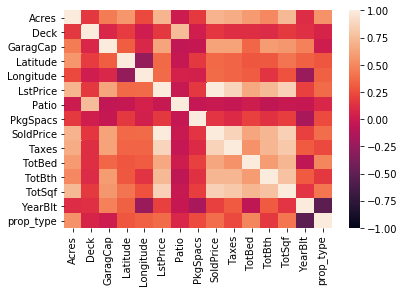

In [11]:
corr_data = df.corr()
display(corr_data)
sb.heatmap(corr_data, vmin=-1, vmax=1)

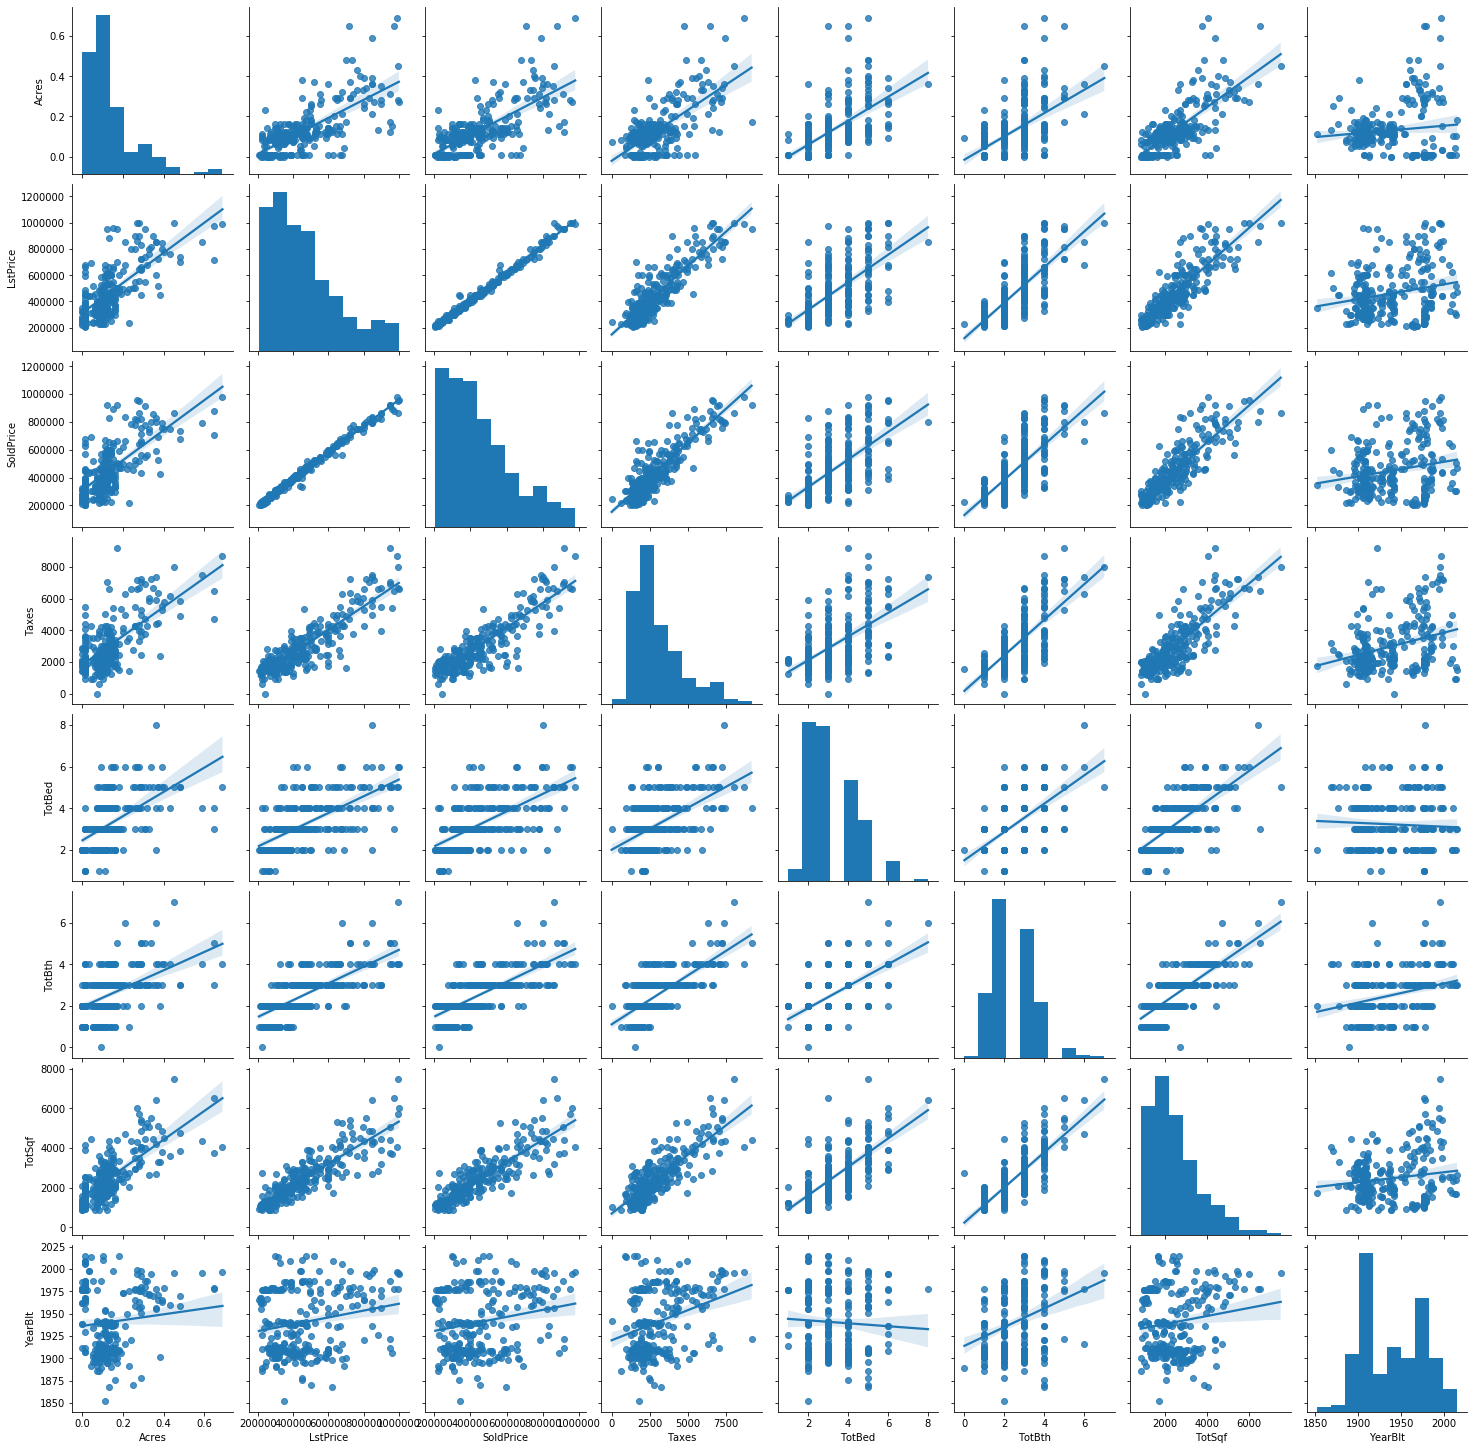

In [12]:
plot_data = df[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
sb.pairplot(plot_data, kind = 'reg')

In [13]:
#The sold price is most highly correlated with list price, unsurprisingly. Total square feet, acres, and even latitude and longitude show a strong relationship with the sold price. 

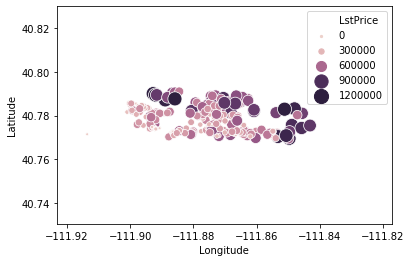

In [14]:
sb.scatterplot(x='Longitude', y='Latitude', data=df, hue='LstPrice', size='LstPrice', sizes=(5,200))

In [15]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
print(gdf.head())
geo_data = GeoData(geo_dataframe = gdf)

#Houses to the north and east are more expensive. 

   Acres  Deck  GaragCap   Latitude   Longitude  LstPrice  Patio  PkgSpacs  \
0   0.29     1         3  40.779524 -111.893542    725000      1         0   
1   0.01     0         0  40.773243 -111.883291    205000      0         0   
2   0.11     0         0  40.773972 -111.867470    390000      1         0   
3   0.14     0         1  40.783009 -111.872100    445000      1         3   
5   0.01     0         2  40.771693 -111.886951    339000      0         2   

        PropType  SoldPrice  Taxes  TotBed  TotBth  TotSqf  YearBlt  \
0  Single Family     752000   7244     4.0     5.0  5415.0     1998   
1          Condo     205000   1431     2.0     1.0   924.0     1965   
2  Single Family     390000   1816     3.0     1.0  1702.0     1940   
3  Single Family     443000   3260     3.0     2.0  1756.0     1940   
5          Condo     334000   2141     3.0     2.0  1368.0     1976   

   prop_type                     geometry  
0          1  POINT (-111.89354 40.77952)  
1          0  PO

In [16]:
center = [40.7749,-111.894]
m = Map(center=center, zoom = 13, basemap=basemaps.Esri.WorldStreetMap)
m

Map(center=[40.7749, -111.894], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [17]:
m.add_layer(geo_data)

In [18]:
import statsmodels.api as sm
y = df['SoldPrice'].to_frame()
x = df['LstPrice'].to_frame()
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SoldPrice   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.622e+05
Date:                Thu, 28 May 2020   Prob (F-statistic):                        0.00
Time:                        10:06:46   Log-Likelihood:                         -2901.7
No. Observations:                 257   AIC:                                      5805.
Df Residuals:                     256   BIC:                                      5809.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LstPrice       0.9688      0.002    402.768      0.000       0.964       0.973
==============================================================================
Omnibus:                      147.663   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1130.371
Skew:                          -2.210   Prob(JB):                    3.49e-246
Kurtosis:                      12.275   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#for every unit increase in list price there is a 0.9688 increase in the sold price. 
#That is to say that for every dollar increase in list price there is about
#a 97 cent increase in sale price. 

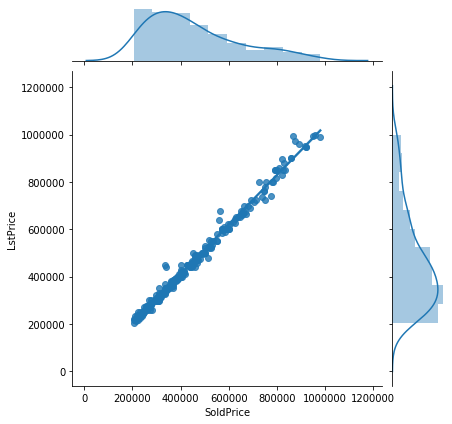

In [20]:
sb.jointplot('SoldPrice', 'LstPrice', data=df, kind="reg")

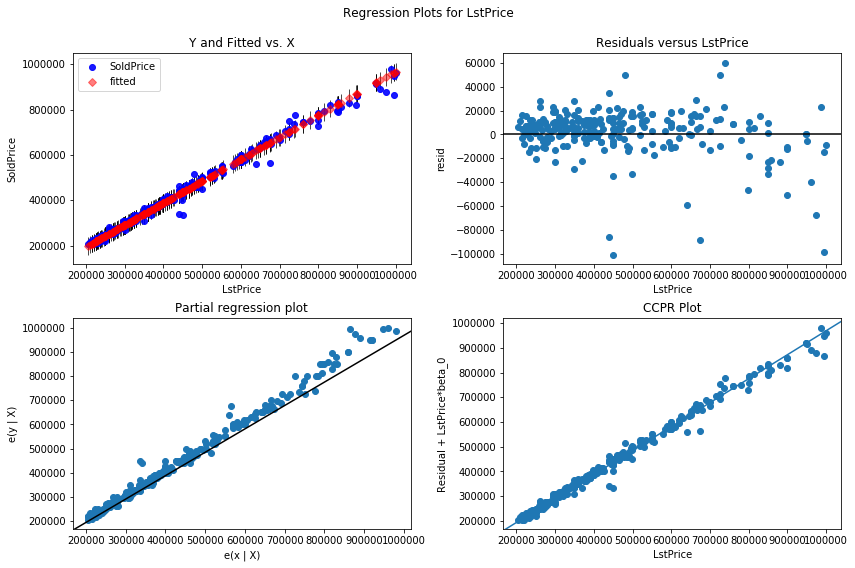

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model1, "LstPrice", fig=fig)

In [22]:
y = df['SoldPrice']
x = df[['Acres','Taxes', 'TotBed', 'TotBth', 'TotSqf', 'PkgSpacs', 'Latitude', 'Longitude']]
x = sm.add_constant(x)
model2 = sm.OLS(y,x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     163.2
Date:                Thu, 28 May 2020   Prob (F-statistic):           3.12e-94
Time:                        10:06:47   Log-Likelihood:                -3248.8
No. Observations:                 257   AIC:                             6516.
Df Residuals:                     248   BIC:                             6548.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.873e+07   4.87e+07      2.028      0.044    2.85e+06    1.95e+08
Acres       8.726e+04   6.86e+04      1.272      0.204   -4.78e+04    2.22e+05
Taxes         51.9364      5.598      9.278      0.000      40.911      62.962
TotBed      8360.5327   5973.911      1.400      0.163   -3405.538    2.01e+04
TotBth      1.152e+04   7916.257      1.455      0.147   -4070.611    2.71e+04
TotSqf        45.3163      9.659      4.691      0.000      26.292      64.341
PkgSpacs     764.5488   3102.450      0.246      0.806   -5345.961    6875.059
Latitude    1.697e+06   1.14e+06      1.483      0.139   -5.57e+05    3.95e+06
Longitude     1.5e+06   4.34e+05      3.455      0.001    6.45e+05    2.36e+06
==============================================================================
Omnibus:                       26.934   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.595
Skew:                           0.701   Prob(JB):                     1.13e-08
Kurtosis:                       4.206   Cond. No.                     4.49e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

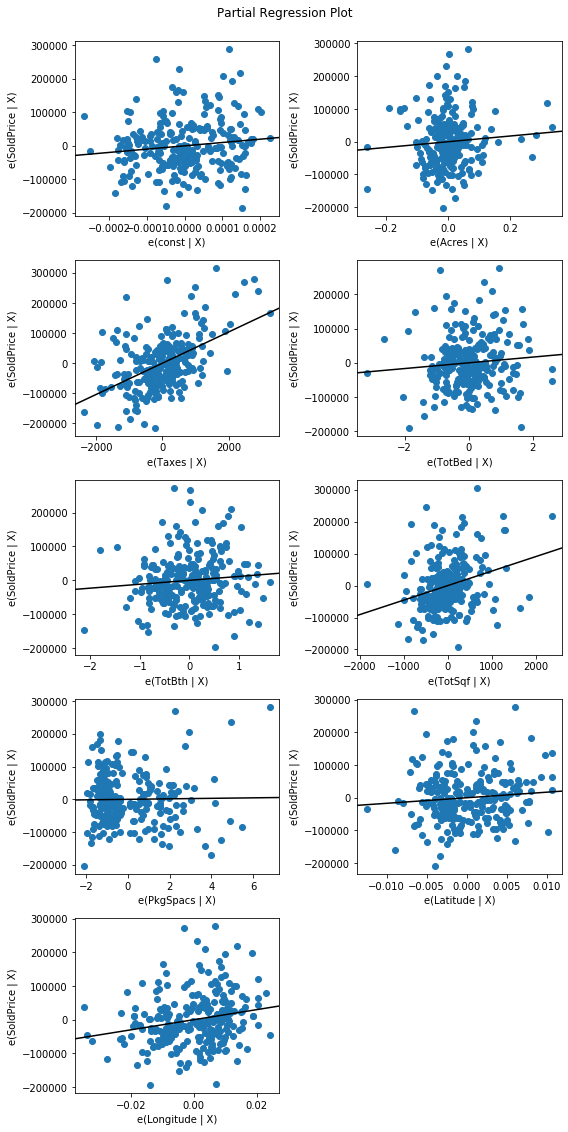

In [23]:
fig = plt.figure(figsize=(8,16))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)

In [24]:
#For every one unit increase in TotSqf you should expect to see an increase in $45 dollars to the sold price.
#Each garage space adds about $765 to the sold price.
#An increase in both latitude and longitude results in an increase in sold price. Houses to the north and east are more expensive. 
#My model is not as good as the list price. It would be hard to beat a R2 of .998.

In [25]:
import statsmodels.formula.api as smf
model3 = smf.ols(formula='SoldPrice ~ C(prop_type)', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     43.93
Date:                Thu, 28 May 2020   Prob (F-statistic):           2.01e-10
Time:                        10:06:48   Log-Likelihood:                -3464.1
No. Observations:                 257   AIC:                             6932.
Df Residuals:                     255   BIC:                             6939.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           3.25e+05   2.19e+04     14.863      0.000    2.82e+05    3.68e+05
C(prop_type)[T.1]  1.668e+05   2.52e+04      6.628      0.000    1.17e+05    2.16e+05
==============================================================================
Omnibus:                       22.941   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.349
Skew:                           0.798   Prob(JB):                     1.15e-06
Kurtosis:                       2.931   Cond. No.                         3.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model3 = smf.ols(formula='SoldPrice ~ C(prop_type) + TotSqf', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     349.6
Date:                Thu, 28 May 2020   Prob (F-statistic):           1.14e-73
Time:                        10:06:48   Log-Likelihood:                -3314.6
No. Observations:                 257   AIC:                             6635.
Df Residuals:                     254   BIC:                             6646.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.183e+05    1.5e+04      7.862      0.000    8.86e+04    1.48e+05
C(prop_type)[T.1]  1.138e+04   1.55e+04      0.732      0.465   -1.92e+04     4.2e+04
TotSqf              130.7057      5.528     23.645      0.000     119.820     141.592
==============================================================================
Omnibus:                       39.046   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.343
Skew:                           0.807   Prob(JB):                     1.95e-16
Kurtosis:                       5.037   Cond. No.                     8.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

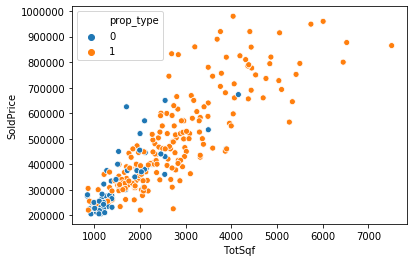

In [27]:
sb.scatterplot(x='TotSqf', y='SoldPrice', data=df, hue='prop_type')

In [28]:
#Condos and townhouses tend to be smaller so the interaction with total square feet is accounted for by the total square feet alone. 